## Random Walks

A random walk is a random process that describes a path that consist of a succession of random steps on some mathematical space. This may seem not interesting, but some processes in nature seem to follow random paths, for example we can think of the Brownian motion. Of course, we can simulate this with a Monte Carlo Simulation.

In [1]:
# importing usefull libraries
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import scipy.stats as stats

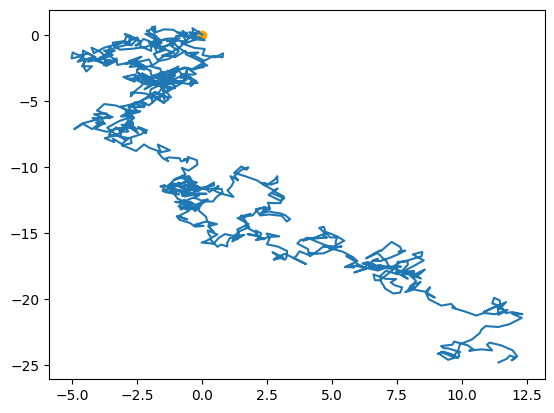

In [2]:
Steps = 1000

x = [0]
y = [0]

for i in range(Steps):
    x.append(rand()+x[i]-.5)
    y.append(rand()+y[i]-.5)

plt.plot(x,y)
plt.scatter(0,0,color = 'orange')
plt.show()

But How can we use random walks to solve a problem of optimization. Well, we first need a problem to solve. 

Suppose we have a number of charged particles, let's say electrons, that live in a 2-dimensional surface of circular shape of where they cannot escape. Let's assume that these electrons are free to move, this is, they are not bounded to any atom.

Here we will introduce the concept of class in Python. Using a class allow us to create objects that will share some properties but will have individual distinctions, in this case we will create electrons, they will have a charge and will be in a 2-dimensional space described by the position in the plane $(x,y)$.

In [26]:
# particles class
class electron:
    charge = -1
    def __init__(self,x_position,y_position):
        self.x = x_position
        self.y = y_position

def move (partic):
    """
    This func moves a particles inside a circle randomly
    """
    x_o = partic.x
    y_o = partic.y

    r = 20
    while r > 10:
        xn = x_o + rand() -0.5
        yn = y_o + rand() -0.5
        r = np.sqrt(xn**2+yn**2)

    partic.x = xn
    partic.y = yn
    return(xn,yn)

def Energy (part_set):
    """
    This func computes the potential energy of the particles set
    """
    E = 0

    for i in part_set:
        x1,y1 = i.x, i.y
        for j in part_set:
            if i == j: continue
            x2,y2 = j.x, j.y

            R = np.sqrt((x1-x2)**2+(y1-y2)**2)
            E += 1/R
    return(E*0.5)

In [29]:
# Seting the initial conditions
a = electron(0,0)
b = electron(0,0)
c = electron(0,0)
d = electron(0,0)
e = electron(0,0)

particles = [a,b,c,d,e]

for i in particles:
    print(move(i))

(0.05159145800986287, 0.34756114137143124)
(-0.2578773874386656, 0.29773879435401973)
(-0.37486240262856063, 0.3101140076173824)
(-0.19969306269025433, 0.46848191299971487)
(0.44577563350600247, 0.3870376145041333)


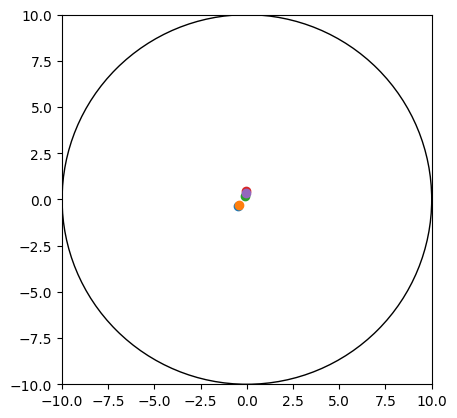

In [28]:
def Circle_plot(part_set):
    figure, axes = plt.subplots()
    axes.set_aspect( 1 )
    for part in part_set:
        plt.scatter(part.x,part.y)
    circ = plt.Circle((0,0),10,fill = False)
    axes.add_artist(circ)
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.show()

Circle_plot(particles)

In [22]:
def Mont_opti_2d (N,part_set):
    E0 = Energy(part_set)
    time = []
    Edt = []
    i = 0
    count = 0
    while i < N:
        count += 1
        j = int(rand()*len(part_set))
        xt,yt = part_set[j].x, part_set[j].y
        move(part_set[j])
        En = Energy(part_set)
        if En < E0:
            E0 = En
            time.append(i)
            Edt.append(E0)
            i += 1
            count = 0
        else:
            part_set[j].x = xt
            part_set[j].y = yt
        if count > N**2:
            break
    return (Edt,time)

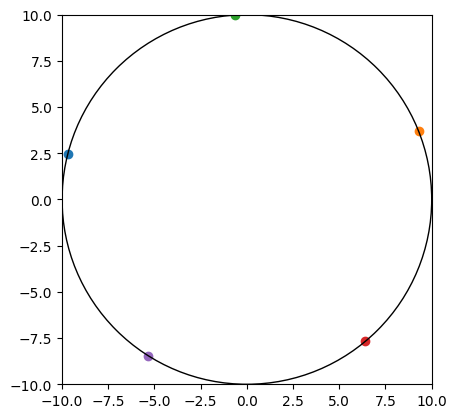

In [23]:
E,t = Mont_opti_2d(300,particles)
Circle_plot(particles)

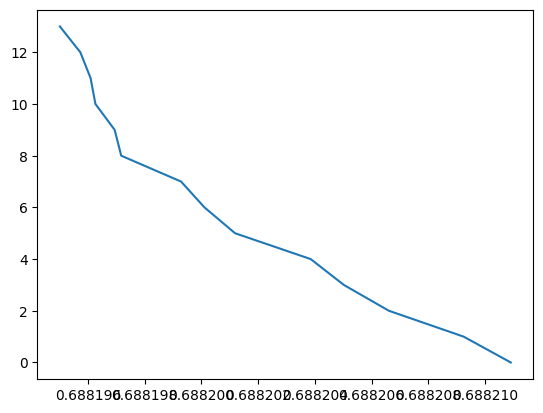

In [24]:
plt.plot(E,t)
plt.show()

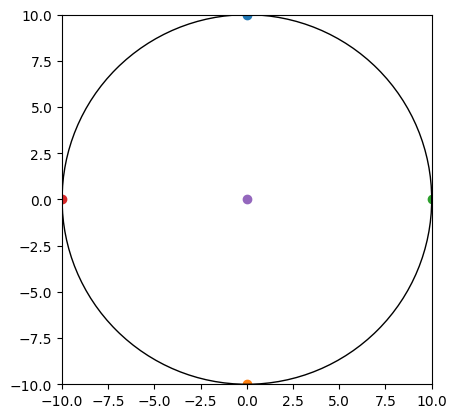

In [13]:
# non stable min configuration
a = electron(0,10)
b = electron(0,-10)
c = electron(10,0)
d = electron(-10,0)
e = electron(0,0)

particles2 = [a,b,c,d,e]
Circle_plot(particles2)

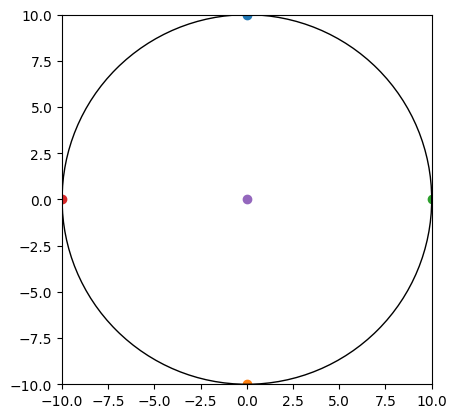

In [14]:
Mont_opti_2d(500,particles2)
Circle_plot(particles2)

In [15]:
print(Energy(particles))
print(Energy(particles2))

0.6881945637087914
0.7828427124746192


We can see that in this case we have not moved, this means we are at a minimum, however by a simple observation we can see that this minimum is no testable. Perhaps is a random configuration that has very low probability of happening but is a good example on how the Monte Carlo algorithm is good to escape from these situations.

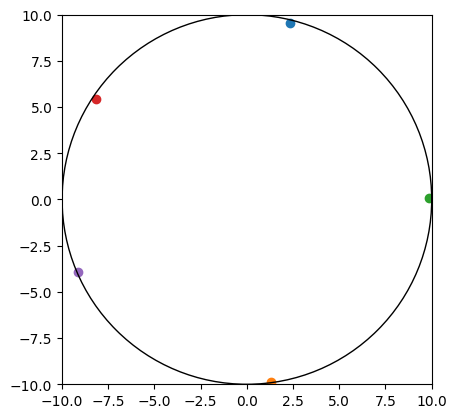

In [30]:
def Mont_opti_2d_2 (N,part_set):
    E0 = Energy(part_set)
    time = []
    Edt = []
    i = 0
    count = 0
    while i < N:
        count += 1
        j = int(rand()*len(part_set))
        xt,yt = part_set[j].x, part_set[j].y
        move(part_set[j])
        En = Energy(part_set)
        if En < E0 or rand() > 0.9:
            time.append(i)
            Edt.append(E0)
            E0 = En
            i += 1
            count = 0
        else:
            part_set[j].x = xt
            part_set[j].y = yt
        if count > N**2:
            break
    return (Edt,time)

E,t = Mont_opti_2d_2(500,particles2)
Circle_plot(particles2)

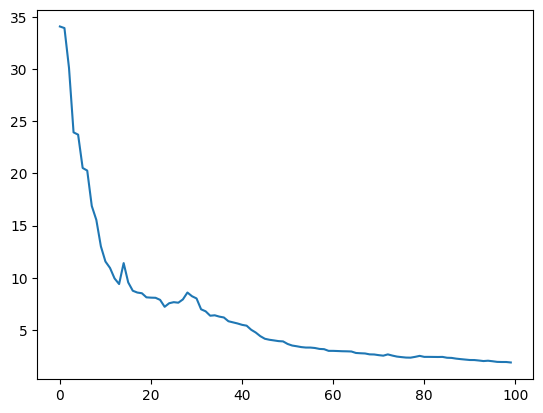

In [32]:
plt.plot(t,E)

Now let's put this to the test with a simple model of a helium atom